In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('./Data/lena.png')

In [20]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

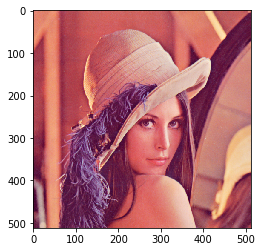

In [44]:
plt.imshow(img_RGB)

In [59]:
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [76]:
img_HSV_reduce = img_HSV.copy()
img_HSV_reduce[...,1] = (np.clip((img_HSV_reduce[...,1]/255.)+0., 0, 1)*255).astype('uint8')
img_RGB_reduce = cv2.cvtColor(img_HSV_reduce, cv2.COLOR_HSV2RGB)

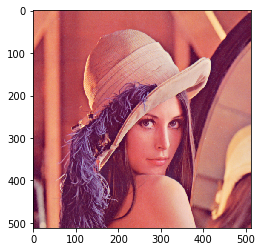

In [77]:
plt.imshow(img_RGB_reduce)

In [78]:
img_HSV_hist = img_HSV.copy()
img_HSV_hist[...,2] = cv2.equalizeHist(img_HSV_hist[...,2])

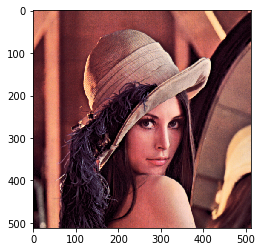

In [79]:
plt.imshow(cv2.cvtColor(img_HSV_hist, cv2.COLOR_HSV2RGB))

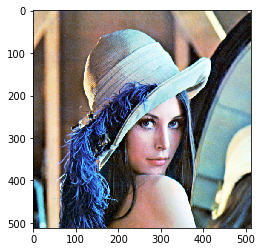

In [100]:
img_hist = img_RGB.copy()
for i in range(3):
    img_hist[...,i] = cv2.equalizeHist(img_hist[...,i])
plt.imshow(img_hist)

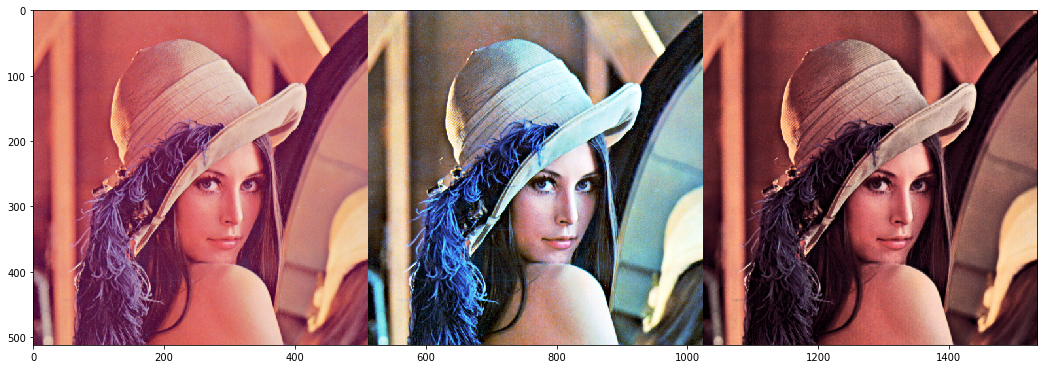

In [105]:
plt.figure(figsize=(18,10))
img_full = np.hstack((img_RGB, 
                      img_hist, 
                      cv2.cvtColor(img_HSV_hist, cv2.COLOR_HSV2RGB)))
plt.imshow(img_full)

## Vedio Contrast

In [10]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

while True:
    ret, img = cap.read()
    
    img_hist = img.copy()
    for i in range(3):
        img_hist[...,i] = cv2.equalizeHist(img_hist[...,i])
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.2, 5)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        cv2.rectangle(img_hist, (x,y), (x+w, y+h), (255,0,0), 2)
        cv2.rectangle(gray, (x,y), (x+w, y+h), (255,0,0), 2)
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = img_full[y:y+h, x:x+w]
        
    img_full = np.hstack((img, img_hist))
#         eyes = eye_cascade.detectMultiScale(roi_gray)
#         for (ex, ey, ew, eh) in eyes:
#             cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
    
    cv2.namedWindow("Henry is my honey", 0)
    cv2.imshow('Henry is my honey', img_full)
    k = cv2.waitKey(10)
    if k == 27:
        cap.release()
        cv2.destroyAllWindows()
        break;

## Gamma Correction 

In [36]:
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, 0.8) * 255.0, 0, 255)
res = cv2.LUT(img_RGB, lookUpTable)

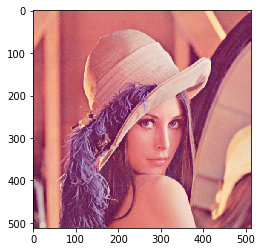

In [37]:
plt.imshow(res)